In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import matplotlib.pyplot as plt
from collections import Counter

2023-06-13 11:50:43.409357: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 11:50:49.785191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x = []
y = []

f = open("12_06_2023_14_27_16.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("12_06_2023_14_30_18.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("12_06_2023_15_14_35.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

x = np.array(x)
#x = x[:,:,0:2]
y = np.array(y)

In [3]:
x

array([[[0.1305968 , 0.29541839, 0.8293432 ],
        [0.21283835, 0.10854983, 0.707444  ],
        [0.3321087 , 0.03053165, 0.6149055 ],
        ...,
        [0.47657488, 0.84281717, 0.5208287 ],
        [0.5857893 , 0.93460058, 0.4949197 ],
        [0.67083788, 1.        , 0.47992731]],

       [[0.07826894, 0.25377185, 0.7495533 ],
        [0.16728102, 0.09202892, 0.651708  ],
        [0.30033613, 0.045235  , 0.5842291 ],
        ...,
        [0.46460392, 0.83464883, 0.5026624 ],
        [0.56692068, 0.92968043, 0.4837764 ],
        [0.64929627, 1.        , 0.47779435]],

       [[0.08208973, 0.24199077, 0.7381483 ],
        [0.19222648, 0.0853544 , 0.6624647 ],
        [0.33909368, 0.03904876, 0.6094433 ],
        ...,
        [0.46288485, 0.83839899, 0.488067  ],
        [0.56850349, 0.93027733, 0.4600671 ],
        [0.65206072, 1.        , 0.44572769]],

       ...,

       [[0.61749821, 0.        , 0.5247479 ],
        [0.70181726, 0.20547938, 0.543931  ],
        [0.68059244, 0

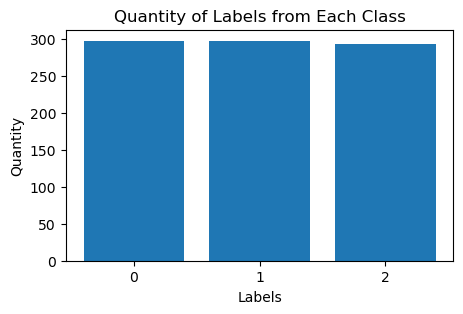

In [4]:
def draw_bar_chart(labels):
    fig, ax = plt.subplots(figsize=(5, 3))
    # Count the frequency of each label
    label_counts = Counter(labels)

    # Get the labels and their respective counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Set up the bar chart
    plt.bar(labels, counts)
    ax.set_xticks(labels)
    plt.xlabel('Labels')
    plt.ylabel('Quantity')
    plt.title('Quantity of Labels from Each Class')

    # Display the chart
    plt.show()

draw_bar_chart(y)

[0 1 2]
3


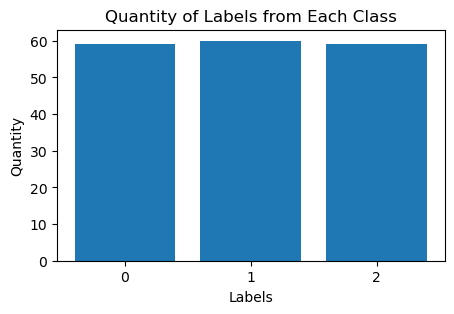

In [5]:
num = len(y)

idx = np.random.permutation(num)

x = x[idx]
y = y[idx]

n_classes = len(np.unique(y))

print(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle2(x, y)

#x_train = x_train.reshape(-1, x.shape[1], x.shape[2], 1)
#x_val = x_val.reshape(-1, x.shape[1], x.shape[2], 1)
#x_test = x_test.reshape(-1, x.shape[1], x.shape[2], 1)

draw_bar_chart(y_val)

In [6]:
def fc_model():
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   #model.add(tf.keras.Input(shape=(21,3)))
   model.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(21,3)))
   model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dense(16, activation='relu'))
   model.add(tf.keras.layers.Dense(3, activation="softmax"))
   return model

In [7]:
input_shape = x.shape[1:]

model = fc_model()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    #validation_split=0.2,
    epochs=10000,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

2023-06-13 11:51:03.923900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-13 11:51:04.105445: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-13 11:51:04.107529: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 32)            224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 16)                9744      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 10,019
Trainable params: 10,019
Non-trainable params: 0
____________________________________________________

2023-06-13 11:51:16.639816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-06-13 11:51:18.886809: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f88b800b3a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-13 11:51:18.886876: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-06-13 11:51:19.526435: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-13 11:51:22.275223: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 13s 181ms/step - loss: 1.0998 - sparse_categorical_accuracy: 0.3315 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.3427
Epoch 2/10000
5/5 [==============================] - 0s 20ms/step - loss: 1.0947 - sparse_categorical_accuracy: 0.3502 - val_loss: 1.0928 - val_sparse_categorical_accuracy: 0.3539
Epoch 3/10000
5/5 [==============================] - 0s 33ms/step - loss: 1.0910 - sparse_categorical_accuracy: 0.3670 - val_loss: 1.0904 - val_sparse_categorical_accuracy: 0.3596
Epoch 4/10000
5/5 [==============================] - 0s 27ms/step - loss: 1.0887 - sparse_categorical_accuracy: 0.3670 - val_loss: 1.0886 - val_sparse_categorical_accuracy: 0.3596
Epoch 5/10000
5/5 [==============================] - 0s 25ms/step - loss: 1.0866 - sparse_categorical_accuracy: 0.3727 - val_loss: 1.0871 - val_sparse_categorical_accuracy: 0.3652
Epoch 6/10000
5/5 [==============================] - 0s 24ms/step - loss: 1.0848 - sparse_categorical_accuracy: 

[0.4002748429775238, 0.8539325594902039]

In [8]:
# maior early stopping, dropout, matriz de confusao, alterar batch size, alterar kernel size, transformers

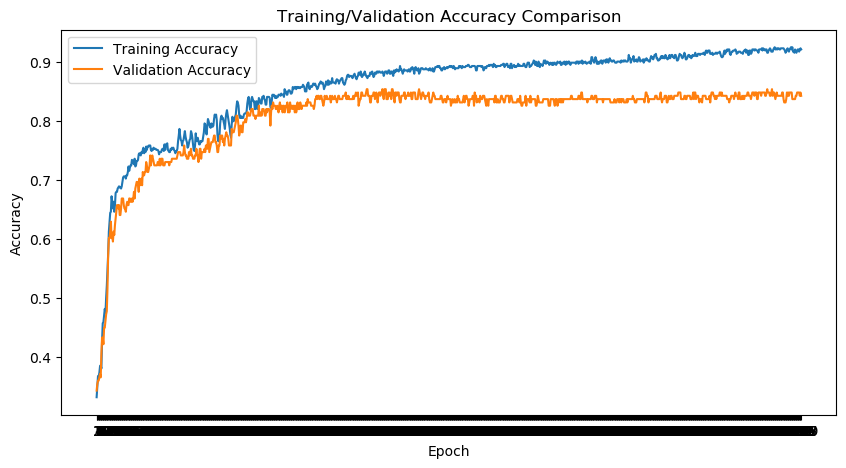

In [9]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

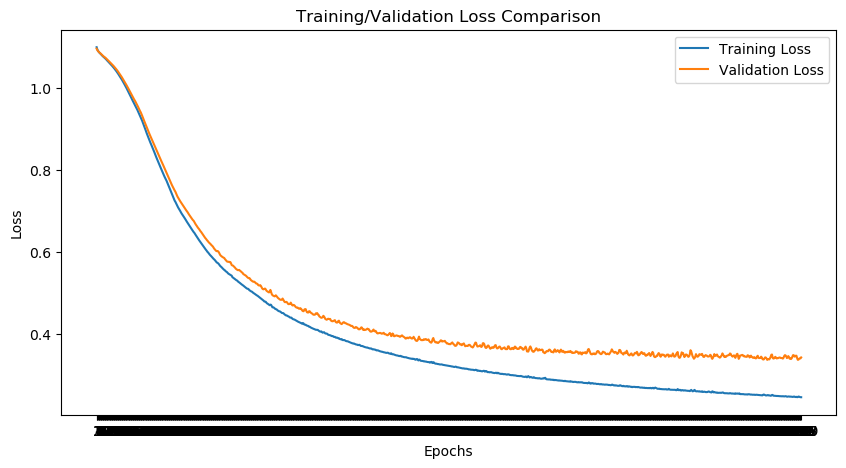

In [10]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

6/6 [==============================] - 1s 5ms/step


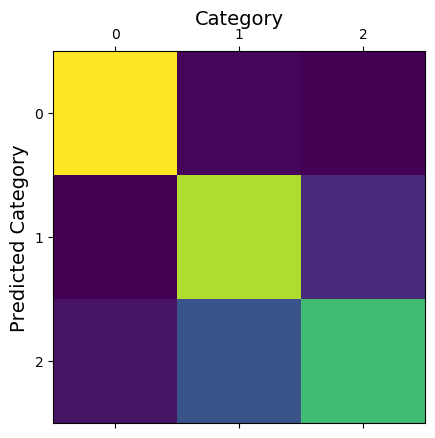

In [11]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred)

In [12]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [13]:
# model.save('../models/points_conv_1d')

In [14]:
#model = tf.keras.models.load_model('../models/transformer_numbers')